# Corona Diaries

In [ ]:
import pandas as pd
corona_diaries = pd.read_csv('/content/Corona_Diary - Sheet1.csv')
corona_diaries.head()

,Date,Time,Temperature,Medicine_Dose,Steaming,Steam_time,Gargling,Gargling_time,Oxygen,Heart_rate,Severity
0,18/3/2021,2:42:00 PM,96.8,1,1,2.0,0,0.0,97.0,80.0,2
1,18/3/2021,4:33:00 PM,98.0,1,1,2.5,0,0.0,99.0,77.0,2
2,18/3/2021,6:42:00 PM,98.0,1,1,1.0,0,0.0,97.0,75.0,2
3,18/3/2021,8:45:00 PM,98.2,1,1,2.5,0,0.0,97.0,79.0,2
4,18/3/2021,10:40:00 PM,98.0,1,1,2.0,1,2.5,98.0,73.0,1


In [ ]:
display(corona_diaries.dtypes)
corona_diaries['Date'] = pd.to_datetime(corona_diaries['Date'])

Date              object
Time              object
Temperature      float64
Medicine_Dose      int64
Steaming           int64
Steam_time       float64
Gargling           int64
Gargling_time    float64
Oxygen           float64
Heart_rate       float64
Severity           int64
dtype: object

In [ ]:
z=[]
for i in range(corona_diaries.shape[0]):
  z.append(pd.to_datetime(corona_diaries['Time'])[i].hour)

corona_diaries['hour'] = z

z=[]
for i in range(corona_diaries.shape[0]):
  z.append(pd.to_datetime(corona_diaries['Time'])[i].minute)

corona_diaries['minute'] = z

z=[]
for i in range(corona_diaries.shape[0]):
  z.append(pd.to_datetime(corona_diaries['Date'])[i].day)

corona_diaries['day'] = z



In [ ]:
corona_diaries = corona_diaries.fillna(0.0)

In [ ]:
train = corona_diaries.drop(['Date','Time'],axis=1)

In [ ]:
X = train.drop(['Severity'],axis=1)
y = train['Severity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             f1_score,
                             recall_score,
                             precision_recall_fscore_support,
                             roc_auc_score)
def get_acc(y_pred,y_test):
  f1 = f1_score(y_true = y_test, y_pred = y_pred)
  prec = precision_score(y_true = y_test, y_pred = y_pred)
  rec = recall_score(y_pred, y_test)
  acc = accuracy_score(y_pred, y_test)
  # roc = roc_auc_score(y_test, y_pred)
  print("F1 Score : ", f1)
  print("Precision : ", prec)
  print("Reall : ", rec)
  print("Accuracy : ", acc)
  # print("ROC : ", roc)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
get_acc(y_pred,y_test)

F1 Score :  0.5
Precision :  1.0
Reall :  1.0
Accuracy :  0.3333333333333333


[Text(223.20000000000002, 190.26, 'X[5] <= 2.0\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(167.4, 135.9, 'X[3] <= 4.25\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(111.60000000000001, 81.53999999999999, 'X[7] <= 91.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

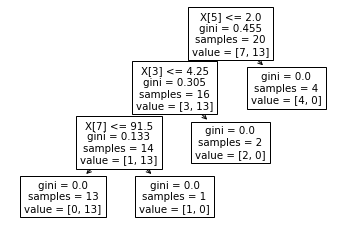

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(dt)

In [ ]:
X.columns

Index(['Temperature', 'Medicine_Dose', 'Steaming', 'Steam_time', 'Gargling',
       'Gargling_time', 'Oxygen', 'Heart_rate', 'hour', 'minute', 'day'],
      dtype='object')

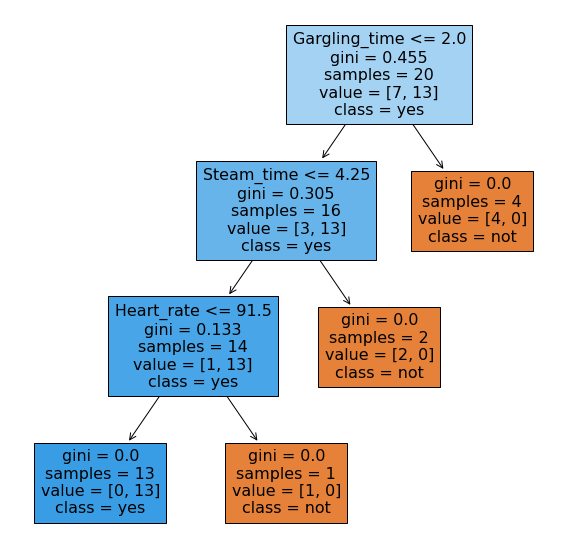

In [ ]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names=['not','yes'],
                   filled=True)


In [ ]:
pip install dtreeviz

     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.2-cp37-none-any.whl size=60009 sha256=1e4b96f7040d568ce0df6ef948ce6f656bcbb2570c09507fad76e6c94da869fb
  Stored in directory: /root/.cache/pip/wheels/b9/4b/20/0bde3e04ace9178327ffabf575f9bbc4abb1d0c4f8c355306a
Successfully built dtreeviz


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


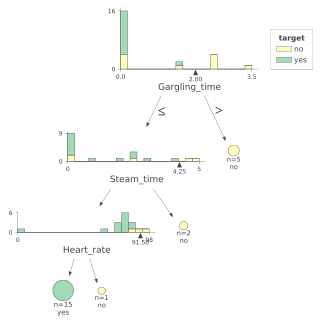

<Figure size 720x720 with 0 Axes>

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package
plt.figure(figsize=(10,10))
viz = dtreeviz(dt, X, y,
                target_name="target",
                feature_names=X.columns,
                class_names=list(['no','yes']))

viz


In [ ]:
import numpy as np

In [ ]:
w=np.array([np.array([[0.2, -0.3], [.4,.1], [-.5,.2]]),np.array([-.3,-.2])], dtype='object')
b=np.array([np.array([-.4,.2]),np.array([.1])], dtype='object')
x=np.array([1,0,1])

In [ ]:
# print(np.dot(w[0].T, x))
# print(b[0])
# print(np.dot(w[0].T, x) + b[0])
act1 = 1 / (1+np.exp(-1*(np.dot(w[0].T, x) + b[0])))
print(act1)

##layer2

# print(b[1])
# print(np.dot(w[1].T, x) + b[0])
act2 = 1 / (1+np.exp(-1*(np.dot(w[1].T, act1)+b[1])))
print(act2)

[0.33181223 0.52497919]
[0.4738889]


In [ ]:
acts = np.array(np.array([act1,act2], dtype='object'), dtype='object')
acts

array([array([0.33181223, 0.52497919]), array([0.4738889])], dtype=object)

In [ ]:
tj=1
der = acts[1]*(1-acts[1])*(tj-acts[1])
print(der)

[0.13116908]


In [ ]:
acts[0]*w[1]*der*(1-acts[0])

array([-0.00872456, -0.00654209])

In [ ]:
lr=0.9
# w[0] +=  lr*der*acts[0]

In [ ]:
der

array([0.13116908])

In [ ]:
w[1]+lr*acts[1]*der

array([-0.24405639, -0.14405639])

In [ ]:
  w[0]

array([[ 0.23917115, -0.23802507],
       [ 0.43917115,  0.16197493],
       [-0.46082885,  0.26197493]])

In [ ]:
import pandas as pd
train = pd.read_csv('/content/PlayTennis.csv')

In [ ]:
train.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
p,n = train['play'].value_counts()

In [ ]:
def get_entropy(p,n):
  from scipy.stats import entropy
  return entropy([p/(p+n),n/(p+n)],base=2)

In [ ]:
get_entropy(p,n)

0.940285958670631

In [ ]:
train['count'] = 0
z = train.groupby(['outlook','play'],as_index=False)['count'].count()
z

,outlook,play,count
0,overcast,yes,4
1,rainy,no,2
2,rainy,yes,3
3,sunny,no,3
4,sunny,yes,2


In [ ]:
z[['outlook','play', 'count']]

,outlook,play,count
0,overcast,yes,4
1,rainy,no,2
2,rainy,yes,3
3,sunny,no,3
4,sunny,yes,2


In [ ]:
for el in z['outlook'].unique():
  display(z[z['outlook']==el]['count'])
  if z[z['outlook']==el]['play'][0]=='yes':
    
  display(z[z['outlook']==el]['play'])

0    4
Name: count, dtype: int64

0    yes
Name: play, dtype: object

1    2
2    3
Name: count, dtype: int64

1     no
2    yes
Name: play, dtype: object

3    3
4    2
Name: count, dtype: int64

3     no
4    yes
Name: play, dtype: object